In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
sns.set()
%matplotlib inline

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

print('train_data shape:', train_data.shape)
print('test_data shape:', test_data.shape)
train_data.head()

train_data shape: (1460, 81)
test_data shape: (1459, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# 将数据特征与标签进行拆分
x_train = train_data.iloc[:,:80]
y_train = train_data['SalePrice']
x_test = test_data

# 将训练数据集与测试数据集合并
full_data = pd.concat((x_train, x_test), axis=0)
print('shape:', full_data.shape)
full_data.head()

shape: (2919, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


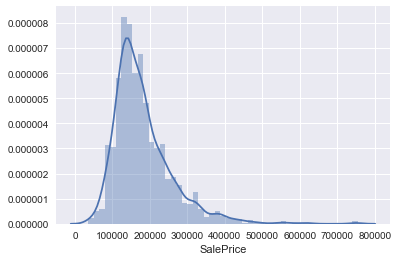

In [4]:
# 查看SalePrice分布
sns.distplot(y_train)

In [5]:
# 可以看到SalePrice偏离正太分布
# 查看SalePrice峰度和偏度

print('Skewness:%f' % train_data['SalePrice'].skew()) # 偏度
print('Kurtosis:%f' % train_data['SalePrice'].kurt()) # 峰度

Skewness:1.882876
Kurtosis:6.536282


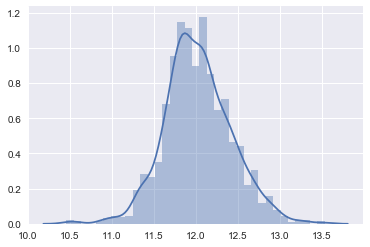

In [6]:
# 对SalePrice进行平滑处理
y_train = pd.DataFrame(np.log1p(y_train))

# 查看平滑处理后的SalePrice分布情况
sns.distplot(y_train)

<font color=blue>缺失值处理</font>

In [7]:
# 定义查看缺失值百分比函数
def missing_data(df):
    missing = df.isnull().sum() # 统计每个特征缺失值情况
    total = df.isnull().count() # 统计每个特征的数量
    percent = missing/total # 计算缺失值百分比
    missing_data = pd.concat((missing, percent), axis=1, keys=['Missing', 'Percent'])
    missing_data = missing_data.sort_values(by=['Missing'], ascending=False)
    return missing_data

In [8]:
# 查看训练数据集缺失情况
miss_df = missing_data(train_data)
miss_df = miss_df[miss_df['Percent']>0]
miss_df

,Missing,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


In [9]:
# 看到有几个特征缺失值超过15%，且查找该特征对应描述后判断可以删除该特征
miss_delete = miss_df[miss_df['Percent']>0.15].index
full_data.drop(miss_delete, axis=1, inplace=True)

# 同样处理训练数据集并更新miss_df
train_data.drop(miss_delete, axis=1, inplace=True)
miss_df = missing_data(train_data)

In [10]:
# GarageX变量群的缺失数据量相同，由于关于车库的重要信息都可以由GarageCars表达，并且缺失只占数据的5%，于是可以删除其他信息
# 同理，对BsmtX变量群做相同处理
miss_delete = miss_df[miss_df['Missing']>1].index
full_data.drop(miss_delete, axis=1, inplace=True)

# 同样处理训练数据集并更新miss_df
train_data.drop(miss_delete, axis=1, inplace=True)
miss_df = missing_data(train_data)

In [11]:
# 查看处理过后的所有数据的缺失情况
full_miss_df = missing_data(full_data)
full_miss_df = full_miss_df[full_miss_df['Percent']>0]
full_miss_df

,Missing,Percent
MSZoning,4,0.001370
Functional,2,0.000685
BsmtFullBath,2,0.000685
BsmtHalfBath,2,0.000685
Utilities,2,0.000685
BsmtUnfSF,1,0.000343
BsmtFinSF2,1,0.000343
Exterior2nd,1,0.000343
GarageCars,1,0.000343
GarageArea,1,0.000343


In [12]:
# 可以看到现在缺失的数据缺失很少，直接用出现频率最高数据填充

for column in full_miss_df.index:
    full_data[column].fillna(full_data[column].value_counts().index[0], inplace=True)
    
full_miss_df = missing_data(full_data)
full_miss_df = full_miss_df[full_miss_df['Percent']>0]
full_miss_df

,Missing,Percent


<font color=blue>数据处理</font>

In [13]:
# 观察到MSSubClass为category类型数据，应转换为str

full_data['MSSubClass'] = full_data['MSSubClass'].astype(str)

In [14]:
obj_index = full_data.dtypes[full_data.dtypes=='object'].index # 取出object类型的特征
num_index = full_data.dtypes[(full_data.dtypes!='object')&(full_data.dtypes.index!='Id')].index # 取出非object类型特征

In [15]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# 将数值转换为离散数字
for column in obj_index:
    full_data[column] = LabelEncoder().fit_transform(full_data[column])
    
# 将数字标准化处理，符合均值为0，方差为1的正太分布
for column in num_index:
    full_data[column] = StandardScaler().fit_transform(full_data[column].reshape(-1, 1))
    
for column in obj_index:
    full_data[column] = StandardScaler().fit_transform(full_data[column].reshape(-1, 1))

<font color=blue>PCA主成分分析</font>

In [16]:
from sklearn.decomposition import PCA

n_train=train_data.shape[0]
x_train = full_data[:n_train].drop('Id', axis=1, inplace=False)
x_test = full_data[n_train:]

pca = PCA(n_components=20)
newX = pca.fit_transform(x_train)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_)

[0.12943092 0.06182133 0.05169429 0.0393794  0.03457208 0.03258568
 0.03000454 0.02670226 0.02519834 0.02341088 0.0226641  0.02169781
 0.0209882  0.02089881 0.01906152 0.0186054  0.01836446 0.01736042
 0.01675021 0.01637322]
[8.28451277 3.95701078 3.3088072  2.52056586 2.21286227 2.08571866
 1.9205073  1.70913718 1.6128756  1.49846491 1.45066574 1.38881647
 1.34339594 1.33767457 1.22007449 1.19088002 1.17545762 1.1111918
 1.0721345  1.04800391]


In [17]:
# 这里因为没有做特征工程，所以pca降维效果不好

# 保存数据处理后的数据
n_train=train_data.shape[0]
train_data = pd.concat((full_data[:n_train], y_train), axis=1)
test_data = full_data[n_train:]

train_data.to_csv('train_data.csv', index=False)
test_data.to_csv('test_data.csv', index=False)